# 笔记
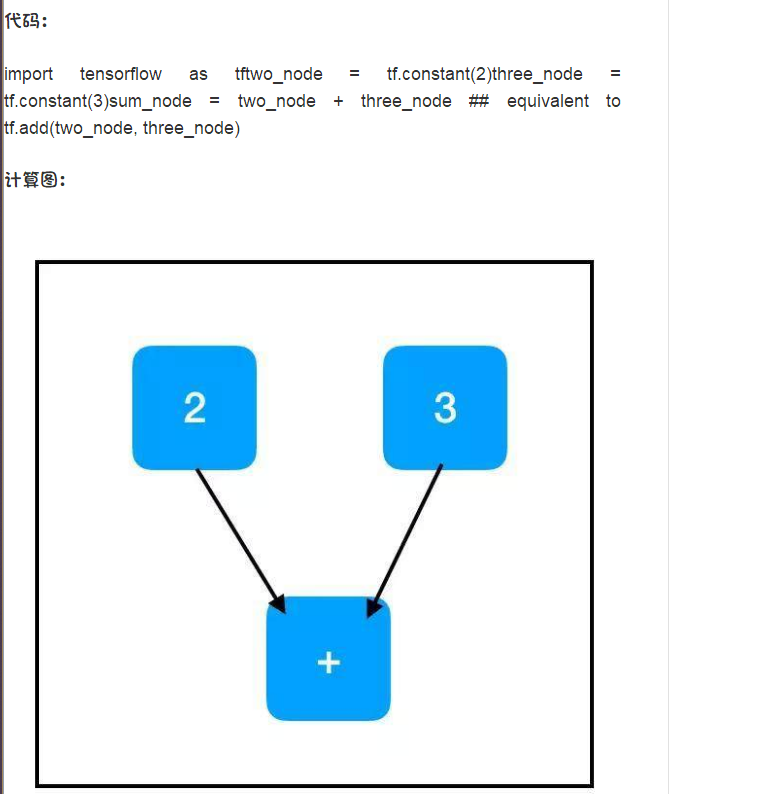
所以 two_node 指向包含 2 的节点，three_node 指向包含 3 的节点，同时 sum_node 指向包含 ...+ 的节点。计算图只包含步骤，不包含结果，至少现在还没有
## 会话 Session
会话的作用是处理内存分配和优化，使我们能够实际执行由计算图指定的计算。你可以将计算图想象为我们想要执行的计算的「模版」：它列出了所有步骤。为了使用计算图，我们需要启动一个会话，它使我们能够实际地完成任务；例如，遍历模版的所有节点来分配一堆用于存储计算输出的存储器
创建会话对象后，可以使用 sess.run(node) 返回节点的值，并且 TensorFlow 将执行确定该值所需的所有计算。

In [8]:
#引入 tensorflow 模块
import tensorflow as tf

t0=tf.constant(3,dtype=tf.int32) #0阶
t1=tf.constant([3.,4.1,5.2],dtype=tf.float32)# 创建一个浮点数的一维数组，即 1 阶 Tensor
t2=tf.constant([['Apple','Orange'],['Photo','Tomato']],dtype=tf.string)# 创建一个字符串的2x2数组，即 2 阶 Tensor
t3=tf.constant([ [[5],[6],[7]],[[4],[3],[2]] ]) #2*3*1matrix 创建一个 2x3x1 数组，即 3 阶张量，数据类型默认为整型

print(t0)
print(t1)
print(t2)
print(t3)
'''print 一个 Tensor 只能打印出它的属性定义，并不能打印出它的值，要想查看一个 Tensor 中的值还需要经过Session 运行一下：'''
sess=tf.Session()
print(sess.run(t0))
print(sess.run(t1))
print(sess.run(t2))
print(sess.run(t3))


Tensor("Const_15:0", shape=(), dtype=int32)
Tensor("Const_16:0", shape=(3,), dtype=float32)
Tensor("Const_17:0", shape=(2, 2), dtype=string)
Tensor("Const_18:0", shape=(2, 3, 1), dtype=int32)
3
[ 3.          4.0999999   5.19999981]
[[b'Apple' b'Orange']
 [b'Photo' b'Tomato']]
[[[5]
  [6]
  [7]]

 [[4]
  [3]
  [2]]]


# 张量
3                                       # 这个 0 阶张量就是标量，shape=[]
[1., 2., 3.]                            # 这个 1 阶张量就是向量，shape=[3]
[[1., 2., 3.], [4., 5., 6.]]            # 这个 2 阶张量就是二维数组，shape=[2, 3]
[[[1., 2., 3.]], [[7., 8., 9.]]]        # 这个 3 阶张量就是三维数组，shape=[2, 1, 3]
 创建一个整型常量，即 0 阶 Tensor
t0 = tf.constant(3, dtype=tf.int32)

 创建一个浮点数的一维数组，即 1 阶 Tensor
t1 = tf.constant([3., 4.1, 5.2], dtype=tf.float32)

 创建一个字符串的2x2数组，即 2 阶 Tensor
t2 = tf.constant([['Apple', 'Orange'], ['Potato', 'Tomato']], dtype=tf.string)

 创建一个 2x3x1 数组，即 3 阶张量，数据类型默认为整型
t3 = tf.constant([[[5], [6], [7]], [[4], [3], [2]]])

In [1]:
import tensorflow as tf
#创建哪个常量节点
node1=tf.constant(3.2)
node2=tf.constant(4.8)
#创建一个 adder 节点，对上面两个节点执行 + 操作
adder=node1+node2
print(adder)
sess=tf.Session()
print(sess.run(adder))

Tensor("add:0", shape=(), dtype=float32)
8.0


# 关于模型评估的方法
https://blog.csdn.net/qq_26898461/article/details/50639880

交叉验证，把数据分成两部分独立的测试/训练数据
这样计算出测试数据的均方误差（MSE：真实值与模型预测值的误差平方的平均值）就可以 拟合出   对于预测未知数据 可能出现的均方误差（MSE）

# 对于tensroflow中节点的理解

https://baijiahao.baidu.com/s?id=1604877144040331406&wfr=spider&for=pc&qq-pf-to=pcqq.c2c

梯度下降算法中，梯度是什么意思

train_op 训练节点回溯输入和损失的计算路径，寻找变量节点。对于它找到的每个变量节点，计算该变量对于损失的梯度。然后计算该变量的新值：当前值减去梯度乘以学习率的积。

In [2]:
#tensorflow版本　　本次使用ＣＰＵ版本
import tensorflow as tf
tf.__version__

'1.2.1'

In [2]:
# 我们会用到NumPy来处理各种训练数据
import numpy as np
import tensorflow as tf

# 创建一个特征向量列表，该特征列表里只有一个特征向量，
# 该特征向量为实数向量，只有一个元素的数组，且该元素名称为 x，
# 我们还可以创建其他更加复杂的特征列表
feature_columns = [tf.feature_column.numeric_column("x", shape=[1])]

# 创建一个LinearRegressor训练器，并传入特征向量列表
estimator = tf.estimator.LinearRegressor(feature_columns=feature_columns)

# 保存训练用的数据
x_train = np.array([1., 2., 3., 6., 8.])
y_train = np.array([4.8, 8.5, 10.4, 21.0, 25.3])

# 保存评估用的数据
x_eavl = np.array([2., 5., 7., 9.])
y_eavl = np.array([7.6, 17.2, 23.6, 28.8])

# 用训练数据创建一个输入模型，用来进行后面的模型训练
# 第一个参数用来作为线性回归模型的输入数据
# 第二个参数用来作为线性回归模型损失模型的输入
# 第三个参数batch_size表示每批训练数据的个数
# 第四个参数num_epochs为epoch的次数，将训练集的所有数据都训练一遍为1次epoch
# 低五个参数shuffle为取训练数据是顺序取还是随机取
train_input_fn = tf.estimator.inputs.numpy_input_fn(
    {"x": x_train}, y_train, batch_size=2, num_epochs=None, shuffle=True)

# 再用训练数据创建一个输入模型，用来进行后面的模型评估
train_input_fn_2 = tf.estimator.inputs.numpy_input_fn(
    {"x": x_train}, y_train, batch_size=2, num_epochs=1000, shuffle=False)

# 用评估数据创建一个输入模型，用来进行后面的模型评估
eval_input_fn = tf.estimator.inputs.numpy_input_fn(
    {"x": x_eavl}, y_eavl, batch_size=2, num_epochs=1000, shuffle=False)

# 使用训练数据训练1000次
estimator.train(input_fn=train_input_fn, steps=1000)

# 使用原来训练数据评估一下模型，目的是查看训练的结果
# 查看原始训练数据拟合出的模型 和 训练数据的均方误差
train_metrics = estimator.evaluate(input_fn=train_input_fn_2)
print("train metrics: %r" % train_metrics)

# 使用评估数据评估一下模型，目的是验证模型的泛化性能
# 查看未知新数据 和 拟合出的模型的均方误差
eval_metrics = estimator.evaluate(input_fn=eval_input_fn)
print("eval metrics: %s" % eval_metrics)

AttributeError: type object 'Estimator' has no attribute 'LinearRegressor'

In [1]:
#同学给的范例　用于回归模型
import tensorflow as tf
import numpy as np

inputX=np.random.rand(3000,1)
noise=np.random.normal(0,0.05,inputX.shape)
outputY=inputX*4+1+noise

weight1=tf.Variable(np.random.rand(inputX.shape[1],4))
bias1=tf.Variable(np.random.rand(inputX.shape[1],4))
y1_=tf.matmul(inputX,weight1)+bias1
#第一隐藏层

weight2=tf.Variable(np.random.rand(4,1))
bias2=tf.Variable(np.random.rand(inputX.shape[1],1))
y2_=tf.matmul(y1_,weight2)+bias2
#第2隐藏层

loss=tf.reduce_mean(tf.reduce_sum(tf.square((y2_-outputY)),reduction_indices=[1]))#损失函数（最小二乘）
train=tf.train.GradientDescentOptimizer(0.15).minimize(loss)
#梯度下降算法

init=tf.initialize_all_variables()
sess=tf.Session()
sess.run(init)

for i in range(4000):
    sess.run(train)
print(weight1.eval(sess))
print("-------------")
print(weight2.eval(sess))
print("-------------")
print(bias1.eval(sess))
print("-------------")
print(bias2.eval(sess))

print("--------------------")
x_data=np.matrix([[1.],[2.],[3.]])
print(sess.run(y2_))

Instructions for updating:
Use `tf.global_variables_initializer` instead.
[[0.86633317 0.40795625 1.35664372 1.68902828]]
-------------
[[0.62209364]
 [0.45723004]
 [0.95848798]
 [1.1699113 ]]
-------------
[[0.04854702 0.28485505 0.04858879 0.00663568]]
-------------
[[0.78670427]]
--------------------
[[4.07997041]
 [1.72154928]
 [1.87416064]
 ...
 [2.35899647]
 [4.48890314]
 [4.6793471 ]]


In [3]:
#TensorBoard 促进模型可视化
import tensorflow as tf

#创建节点时设置name，方便在图中识别。变量创建时需要赋初值并且之后还要初始化
W=tf.Variable([0],dtype=tf.float32,name='W')
b=tf.Variable([0],dtype=tf.float32,name='b')
#创建占位Tensor节点 不需要赋初值
x=tf.placeholder(tf.float32,name='x')
y=tf.placeholder(tf.float32,name='y')

#线性模型
linear_model=W*x+b

# 损失模型隐藏到loss-model模块
with tf.name_scope('loss-model'):
    #求误差平方和 损失模型
    loss = tf.reduce_sum(tf.square(linear_model-y))
    # 给损失模型的输出添加scalar(标量的，数量的，分等级的)，用来观察loss的收敛曲线
    tf.summary.scalar('loss',loss)

optmizer=tf.train.GradientDescentOptimizer(0.001)#梯度 下降 优化器/最优控制 (学习率0.001)   
train=optmizer.minimize(loss)#求损失最小值

x_train = [1, 2, 3, 6, 8]
y_train = [4.8, 8.5, 10.4, 21.0, 25.3]

sess=tf.Session()
init=tf.global_variables_initializer()#变量Variable需要初始化
sess.run(init)

#调用merge_all() 搜集所有的操作数据
merged=tf.summary.merge_all()
# 模型运行产生的所有数据保存到 /tmp/tensorflow 文件夹供 TensorBoard 使用
writer=tf.summary.fileWriter('D:\PythonCode\Machine\jupyter1\Tensor\tmp\tensorflow',seee.graph)

# 训练10000次
for i in range(1000):
    #训练时传入merge
    summary,_=sess.run([merged,train],{x:x_train,y:y_train})
    #收集每次训练产生的数据
    writer.add_summary(summary,i)

curr_W,curr_b,curr_loss=sess.run( \
                [W,b,loss],{x:x_train,y:y_train})
print("After train W:%s   b:%s   loss:%s "%(surr_W,curr_b,curr_loss))

AttributeError: module 'tensorflow.python.summary.summary' has no attribute 'fileWriter'

In [3]:
import tensorflow as tf
input_placeholder = tf.placeholder(tf.int32)
sess = tf.Session() 
sess.run(input_placeholder,feed_dict={input_placeholder:2})

array(2)

# 梯度下降算法
梯度的本意是一个向量（矢量），表示某一函数在该点处的方向导数沿着该方向取得最大值的绝对值（因此是正值）。梯度值为各方向导数最大值，梯度的方向为导数（斜率）最大值方向

举一个很形象的例子来表示
就比如登山，想要从山顶上下来。但浓雾太重，无法直接看清该从哪里走。

于是，有一种方法，

根据我们当前所处位置，选择最陡峭的方向（梯度最大的方向），

往那里走一步（一次训练结束后，根据学习率调整各参数比重。学习率越大，每次走的步数越多）

之后，再选择最陡峭的地方走一步，以此类推，最终能走到相对其他地方地势最低的点（运气好就是这个模型的最低点），也就是损失值（均方误差）最小的点。

假设输入的值为2维的，x,y，损失模型值为value。我们可以把他看成一个二元函数  value=f（x，y）

而对于实际的登山 ，xy相当于建立空间坐标系，水平面的x方向和y方向

value则相当于建立空间坐标系，垂直方向上的海拔高度，也就是这座山xy位置处的海拔高度。

每一次训练之后，选择梯度（斜率最大值）方向走一步 x=x-梯度*学习率  y=y-梯度*学习率，训练完后损失模型值减小，（往下山方向走）

多次训练，直到找到局部最优点


# 一篇博客写关于梯度下降算法的

https://www.jianshu.com/p/c7e642877b0e

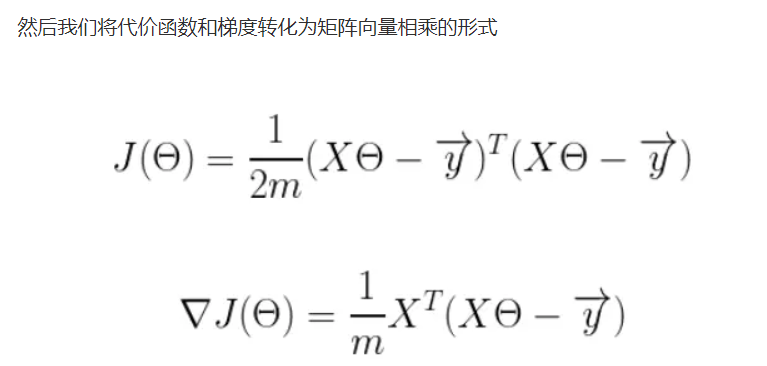

注意理解其中导数为矩阵的倒数 如何计算